## **Building primary dataframe and early eda**

Purpose of the file is to build the primary dataframe and conduct early EDA before Imputing and further cleaning

In [171]:
# read in the data 
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)

### Import data and look at structure

In [172]:
#Read in elections data
candidates = pd.read_csv("ledb_candidatelevel.csv")

#Look at shape, col names, and col types
print(candidates.shape)
print(candidates.columns,'\n')
print(candidates.dtypes)

(126599, 32)
Index(['ledb_candid', 'full_name', 'firstname', 'lastname', 'fips', 'geo_name',
       'state_abb', 'office_consolidated', 'year', 'month', 'district',
       'contest', 'votes', 'vote_share', 'n_winners', 'winner', 'incumbent',
       'contributor.cfscore', 'bonica.cid', 'prob_democrat', 'prob_republican',
       'pid_est', 'prob_female', 'prob_male', 'gender_est', 'prob_black',
       'prob_white', 'prob_hispanic', 'prob_asian', 'prob_other', 'race_est',
       'ballotpedia_url'],
      dtype='object') 

ledb_candid              int64
full_name               object
firstname               object
lastname                object
fips                    object
geo_name                object
state_abb               object
office_consolidated     object
year                     int64
month                  float64
district                object
contest                 object
votes                  float64
vote_share             float64
n_winners                int64
winner    

In [173]:
#Read in city demographics data
cityDem = pd.read_csv("cities_historical_demographics.csv")


#Look at shape, col names, and col types
print(cityDem.shape)
print(cityDem.columns,'\n')
print(cityDem.dtypes)

(1609203, 7)
Index(['place_fips', 'year', 'percent_women', 'percent_white', 'percent_black',
       'percent_hispanic', 'percent_asian_american'],
      dtype='object') 

place_fips                  int64
year                        int64
percent_women             float64
percent_white             float64
percent_black             float64
percent_hispanic          float64
percent_asian_american    float64
dtype: object


In [174]:
candidates.head()

,ledb_candid,full_name,firstname,lastname,fips,geo_name,state_abb,office_consolidated,year,month,district,contest,votes,vote_share,n_winners,winner,incumbent,contributor.cfscore,bonica.cid,prob_democrat,prob_republican,pid_est,prob_female,prob_male,gender_est,prob_black,prob_white,prob_hispanic,prob_asian,prob_other,race_est,ballotpedia_url
0,59965,gil garcetti,gil,garcetti,06037,los angeles,CA,Prosecutor,1992,11.0,los angeles,6037_1992_11_los angeles_CA_Prosecutor_los ang...,2061218.0,0.82,1,win,NaN,-0.81,4.079314e+09,0.88,0.12,D,0.03,0.97,M,0.02,0.83,0.14,0.01,0.0,caucasian,NaN
1,59966,george gascon,george,gascon,06037,los angeles,CA,Prosecutor,2020,11.0,los angeles,6037_2020_11_los angeles_CA_Prosecutor_los ang...,2002865.0,0.54,1,win,0.0,-0.72,3.602384e+10,1.00,0.00,D,0.00,1.00,M,0.14,0.72,0.10,0.03,0.0,caucasian,NaN
2,59968,jackie lacey,jackie,lacey,06037,los angeles,CA,Prosecutor,2020,11.0,los angeles,6037_2020_11_los angeles_CA_Prosecutor_los ang...,1738617.0,0.46,1,lose,1.0,0.25,3.320874e+10,0.73,0.27,D,0.51,0.49,F,0.91,0.09,0.00,0.00,0.0,black,NaN
3,59968,jackie lacey,jackie,lacey,06037,los angeles,CA,Prosecutor,2012,11.0,los angeles,6037_2012_11_los angeles_CA_Prosecutor_los ang...,1503629.0,0.55,1,win,0.0,0.25,3.320874e+10,0.73,0.27,D,0.51,0.49,F,0.91,0.09,0.00,0.00,0.0,black,NaN
4,7904,kim foxx,kim,foxx,17031,cook,IL,Prosecutor,2016,11.0,cook,17031_2016_11_cook_IL_Prosecutor_cook_1,1459087.0,0.72,1,win,0.0,NaN,NaN,1.00,0.00,D,1.00,0.00,F,0.93,0.06,0.00,0.00,0.0,black,NaN


In [175]:
cityDem.head()

,place_fips,year,percent_women,percent_white,percent_black,percent_hispanic,percent_asian_american
0,100100,1970,0.526042,0.671875,0.302083,0.015625,0.010417
1,100124,1970,0.536048,0.633845,0.365154,0.000000,0.001001
2,100460,1970,0.524420,0.716173,0.278623,0.009608,0.002402
3,100484,1970,0.513405,1.037534,0.000000,0.008043,0.000000
4,10062,1970,0.511878,0.996066,0.001816,0.011802,0.001816


### Build df of candidates that competed in an election where the incumbent ran oppossed

In [176]:
#Select most relevant candidate cols
df = candidates[['contest', 'full_name', 'ledb_candid','office_consolidated','fips', 'geo_name', 'year', 'month', 'votes', 'vote_share', 'incumbent', 'winner','n_winners', 'prob_democrat', 'prob_republican', 'pid_est','prob_male', 'prob_female','gender_est', 'prob_black', 'prob_white', 'prob_hispanic','prob_asian','prob_other','race_est', 'contributor.cfscore', 'bonica.cid' ]]

#Only keep mayoral election candidates
df = df.loc[(df['office_consolidated'] == "Mayor")] 

#add city demographic data for the year of the election
df['fips'] = df['fips'].astype(int)
df = pd.merge(df, cityDem, left_on = ['fips', 'year'], right_on=['place_fips', 'year'], how = 'left')

#delete the place_fips column
df = df.drop('place_fips', axis = 1)

#All mayoral candidates 
df.head()

,contest,full_name,ledb_candid,office_consolidated,fips,geo_name,year,month,votes,vote_share,incumbent,winner,n_winners,prob_democrat,prob_republican,pid_est,prob_male,prob_female,gender_est,prob_black,prob_white,prob_hispanic,prob_asian,prob_other,race_est,contributor.cfscore,bonica.cid,percent_women,percent_white,percent_black,percent_hispanic,percent_asian_american
0,3651000_1993_11_new york_NY_Mayor_mayor_1,rudolph giuliani,35608,Mayor,3651000,new york,1993,11.0,930236.0,0.51,0.0,win,1,0.12,0.88,R,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,0.84,4.667066e+09,0.529239,0.499826,0.280773,0.251432,0.200464
1,3651000_1989_11_new york_NY_Mayor_mayor_1,david dinkins,35567,Mayor,3651000,new york,1989,11.0,917544.0,0.50,NaN,win,1,1.00,0.00,D,1.0,0.0,M,1.0,0.0,0.0,0.0,0.0,black,-0.49,3.056702e+10,0.531168,0.531872,0.283704,0.239090,0.171298
2,3651000_1993_11_new york_NY_Mayor_mayor_1,david dinkins,35567,Mayor,3651000,new york,1993,11.0,876896.0,0.48,1.0,lose,1,1.00,0.00,D,1.0,0.0,M,1.0,0.0,0.0,0.0,0.0,black,-0.49,3.056702e+10,0.529239,0.499826,0.280773,0.251432,0.200464
3,3651000_1989_11_new york_NY_Mayor_mayor_1,rudolph giuliani,35608,Mayor,3651000,new york,1989,11.0,870464.0,0.48,NaN,lose,1,0.12,0.88,R,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,0.84,4.667066e+09,0.531168,0.531872,0.283704,0.239090,0.171298
4,3651000_2013_11_new york_NY_Mayor_mayor_1,bill de blasio,34761,Mayor,3651000,new york,2013,11.0,795679.0,0.73,0.0,win,1,1.00,0.00,D,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,NaN,NaN,0.524456,0.436201,0.251765,0.287251,0.222598


**Only keep candidates that were in an election with an incumbent**

In [177]:
#Find all incumbents that ran in mayoral races
incumbents = df.loc[(df['incumbent'] ==1)] 

#Get all the races with an incumbent
incumbent_elections = incumbents['contest'].unique()

#Only keep candidate's that were in incumbent_elections
df = df[df["contest"].isin(incumbent_elections)]

#Df with mayoral candidates that were in elections with an incumbent
df.head()

,contest,full_name,ledb_candid,office_consolidated,fips,geo_name,year,month,votes,vote_share,incumbent,winner,n_winners,prob_democrat,prob_republican,pid_est,prob_male,prob_female,gender_est,prob_black,prob_white,prob_hispanic,prob_asian,prob_other,race_est,contributor.cfscore,bonica.cid,percent_women,percent_white,percent_black,percent_hispanic,percent_asian_american
0,3651000_1993_11_new york_NY_Mayor_mayor_1,rudolph giuliani,35608,Mayor,3651000,new york,1993,11.0,930236.0,0.51,0.0,win,1,0.12,0.88,R,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,0.84,4.667066e+09,0.529239,0.499826,0.280773,0.251432,0.200464
2,3651000_1993_11_new york_NY_Mayor_mayor_1,david dinkins,35567,Mayor,3651000,new york,1993,11.0,876896.0,0.48,1.0,lose,1,1.00,0.00,D,1.0,0.0,M,1.0,0.0,0.0,0.0,0.0,black,-0.49,3.056702e+10,0.529239,0.499826,0.280773,0.251432,0.200464
4,3651000_2013_11_new york_NY_Mayor_mayor_1,bill de blasio,34761,Mayor,3651000,new york,2013,11.0,795679.0,0.73,0.0,win,1,1.00,0.00,D,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,NaN,NaN,0.524456,0.436201,0.251765,0.287251,0.222598
5,3651000_1997_11_new york_NY_Mayor_mayor_1,rudy giuliani,35608,Mayor,3651000,new york,1997,11.0,783815.0,0.58,1.0,win,1,0.00,1.00,R,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,0.55,3.300166e+09,0.527511,0.469403,0.272300,0.261922,0.219124
6,3651000_2017_11_new york_NY_Mayor_mayor_1,bill de blasio,34761,Mayor,3651000,new york,2017,11.0,760112.0,0.66,1.0,win,1,1.00,0.00,D,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,NaN,NaN,0.523626,0.431091,0.246823,0.289247,0.175935


**Get the number of candidates in each race**

In [178]:
#Add number of candidates in the election to the rows
temp = candidates.groupby('contest').agg(candidate_count=('ledb_candid', 'count'))
temp = temp.reset_index()

#Add number of candidates to each election row in df
df = pd.merge(df, temp, on = 'contest', how = 'left')

**Remove incumbents that ran unopposed**

In [179]:
#Remove incumbents that ran uncontested
df = df[df["candidate_count"] > 1]

#how many candidates are left?
print(len(df))

df.head()

5262


,contest,full_name,ledb_candid,office_consolidated,fips,geo_name,year,month,votes,vote_share,incumbent,winner,n_winners,prob_democrat,prob_republican,pid_est,prob_male,prob_female,gender_est,prob_black,prob_white,prob_hispanic,prob_asian,prob_other,race_est,contributor.cfscore,bonica.cid,percent_women,percent_white,percent_black,percent_hispanic,percent_asian_american,candidate_count
0,3651000_1993_11_new york_NY_Mayor_mayor_1,rudolph giuliani,35608,Mayor,3651000,new york,1993,11.0,930236.0,0.51,0.0,win,1,0.12,0.88,R,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,0.84,4.667066e+09,0.529239,0.499826,0.280773,0.251432,0.200464,5
1,3651000_1993_11_new york_NY_Mayor_mayor_1,david dinkins,35567,Mayor,3651000,new york,1993,11.0,876896.0,0.48,1.0,lose,1,1.00,0.00,D,1.0,0.0,M,1.0,0.0,0.0,0.0,0.0,black,-0.49,3.056702e+10,0.529239,0.499826,0.280773,0.251432,0.200464,5
2,3651000_2013_11_new york_NY_Mayor_mayor_1,bill de blasio,34761,Mayor,3651000,new york,2013,11.0,795679.0,0.73,0.0,win,1,1.00,0.00,D,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,NaN,NaN,0.524456,0.436201,0.251765,0.287251,0.222598,18
3,3651000_1997_11_new york_NY_Mayor_mayor_1,rudy giuliani,35608,Mayor,3651000,new york,1997,11.0,783815.0,0.58,1.0,win,1,0.00,1.00,R,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,0.55,3.300166e+09,0.527511,0.469403,0.272300,0.261922,0.219124,6
4,3651000_2017_11_new york_NY_Mayor_mayor_1,bill de blasio,34761,Mayor,3651000,new york,2017,11.0,760112.0,0.66,1.0,win,1,1.00,0.00,D,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,NaN,NaN,0.523626,0.431091,0.246823,0.289247,0.175935,7


### **Basic EDA and descriptive stats**

**Candidate count**

In [180]:
df.sort_values(by = 'candidate_count', ascending = False).head(10)

,contest,full_name,ledb_candid,office_consolidated,fips,geo_name,year,month,votes,vote_share,incumbent,winner,n_winners,prob_democrat,prob_republican,pid_est,prob_male,prob_female,gender_est,prob_black,prob_white,prob_hispanic,prob_asian,prob_other,race_est,contributor.cfscore,bonica.cid,percent_women,percent_white,percent_black,percent_hispanic,percent_asian_american,candidate_count
4254,3918000_2003_11_columbus_OH_Mayor_mayor_1,kenneth besser,40353,Mayor,3918000,columbus,2003,11.0,2154.0,0.03,0.0,lose,1,0.00,1.00,R,1.00,0.00,M,0.00,1.00,0.00,0.00,0.0,caucasian,NaN,1.039734e+08,0.513225,0.659907,0.25521,0.034098,0.053555,33
5549,3918000_2003_11_columbus_OH_Mayor_mayor_1,mickey mouse,40359,Mayor,3918000,columbus,2003,11.0,40.0,0.00,0.0,lose,1,NaN,NaN,NaN,0.98,0.02,M,0.12,0.49,0.04,0.35,0.0,caucasian,NaN,NaN,0.513225,0.659907,0.25521,0.034098,0.053555,33
5652,3918000_2003_11_columbus_OH_Mayor_mayor_1,matt habash,40288,Mayor,3918000,columbus,2003,11.0,4.0,0.00,0.0,lose,1,0.77,0.23,D,0.97,0.03,M,0.00,1.00,0.00,0.00,0.0,caucasian,NaN,3.787777e+09,0.513225,0.659907,0.25521,0.034098,0.053555,33
5673,3918000_2003_11_columbus_OH_Mayor_mayor_1,susan kyte,40323,Mayor,3918000,columbus,2003,11.0,2.0,0.00,0.0,lose,1,0.00,1.00,R,0.02,0.98,F,0.00,0.98,0.01,0.00,0.0,caucasian,0.83,5.000006e+15,0.513225,0.659907,0.25521,0.034098,0.053555,33
5672,3918000_2003_11_columbus_OH_Mayor_mayor_1,wayne woodrow 'woody' hayes,40367,Mayor,3918000,columbus,2003,11.0,2.0,0.00,0.0,lose,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.513225,0.659907,0.25521,0.034098,0.053555,33
5671,3918000_2003_11_columbus_OH_Mayor_mayor_1,david dobos,40342,Mayor,3918000,columbus,2003,11.0,2.0,0.00,0.0,lose,1,0.00,1.00,R,0.99,0.01,M,0.02,0.97,0.01,0.00,0.0,caucasian,0.53,3.490207e+09,0.513225,0.659907,0.25521,0.034098,0.053555,33
5653,3918000_2003_11_columbus_OH_Mayor_mayor_1,cornell mccleary,40250,Mayor,3918000,columbus,2003,11.0,4.0,0.00,0.0,lose,1,0.00,1.00,R,0.99,0.01,M,0.26,0.63,0.08,0.04,0.0,caucasian,NaN,2.584818e+09,0.513225,0.659907,0.25521,0.034098,0.053555,33
5637,3918000_2003_11_columbus_OH_Mayor_mayor_1,john corby,40350,Mayor,3918000,columbus,2003,11.0,6.0,0.00,0.0,lose,1,0.14,0.86,R,1.00,0.00,M,0.00,0.99,0.01,0.00,0.0,caucasian,1.11,4.622033e+09,0.513225,0.659907,0.25521,0.034098,0.053555,33
5667,3918000_2003_11_columbus_OH_Mayor_mayor_1,spongebob squarepants,40364,Mayor,3918000,columbus,2003,11.0,3.0,0.00,0.0,lose,1,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0.89,0.01,0.00,0.0,caucasian,NaN,NaN,0.513225,0.659907,0.25521,0.034098,0.053555,33
5666,3918000_2003_11_columbus_OH_Mayor_mayor_1,snoopy,40371,Mayor,3918000,columbus,2003,11.0,3.0,0.00,0.0,lose,1,NaN,NaN,NaN,NaN,NaN,NaN,0.12,0.51,0.23,0.14,0.0,caucasian,NaN,NaN,0.513225,0.659907,0.25521,0.034098,0.053555,33


**Look into fake write ins**

In [181]:
#do these fake candidates show up again?

fakecandid = (40359, 40371, 40364)

df[(df['ledb_candid'].isin(fakecandid))]



,contest,full_name,ledb_candid,office_consolidated,fips,geo_name,year,month,votes,vote_share,incumbent,winner,n_winners,prob_democrat,prob_republican,pid_est,prob_male,prob_female,gender_est,prob_black,prob_white,prob_hispanic,prob_asian,prob_other,race_est,contributor.cfscore,bonica.cid,percent_women,percent_white,percent_black,percent_hispanic,percent_asian_american,candidate_count
5549,3918000_2003_11_columbus_OH_Mayor_mayor_1,mickey mouse,40359,Mayor,3918000,columbus,2003,11.0,40.0,0.0,0.0,lose,1,NaN,NaN,NaN,0.98,0.02,M,0.12,0.49,0.04,0.35,0.0,caucasian,NaN,NaN,0.513225,0.659907,0.25521,0.034098,0.053555,33
5666,3918000_2003_11_columbus_OH_Mayor_mayor_1,snoopy,40371,Mayor,3918000,columbus,2003,11.0,3.0,0.0,0.0,lose,1,NaN,NaN,NaN,NaN,NaN,NaN,0.12,0.51,0.23,0.14,0.0,caucasian,NaN,NaN,0.513225,0.659907,0.25521,0.034098,0.053555,33
5667,3918000_2003_11_columbus_OH_Mayor_mayor_1,spongebob squarepants,40364,Mayor,3918000,columbus,2003,11.0,3.0,0.0,0.0,lose,1,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0.89,0.01,0.00,0.0,caucasian,NaN,NaN,0.513225,0.659907,0.25521,0.034098,0.053555,33


In [182]:
#Lots of candidates with 0.0 vote share, are they all fake write in?
temp = df[(df['vote_share']==0.0)]

temp.sort_values(by='votes', inplace=True)
temp.head(100)

C:\Users\zspba\AppData\Local\Temp\ipykernel_38736\1087908070.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,contest,full_name,ledb_candid,office_consolidated,fips,geo_name,year,month,votes,vote_share,incumbent,winner,n_winners,prob_democrat,prob_republican,pid_est,prob_male,prob_female,gender_est,prob_black,prob_white,prob_hispanic,prob_asian,prob_other,race_est,contributor.cfscore,bonica.cid,percent_women,percent_white,percent_black,percent_hispanic,percent_asian_american,candidate_count
5750,952000_2021_11_new haven_CT_Mayor_mayor_1,roger uihlein,79143,Mayor,952000,new haven,2021,11.0,1.0,0.0,0.0,lose,1,0.92,0.08,D,1.00,0.00,M,0.00,1.00,0.00,0.00,0.0,caucasian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5697,908000_1999_11_bridgeport_CT_Mayor_mayor_1,john demko,78746,Mayor,908000,bridgeport,1999,11.0,1.0,0.0,0.0,lose,1,0.44,0.56,R,1.00,0.00,M,0.01,0.98,0.01,0.00,0.0,caucasian,NaN,NaN,0.523230,0.463760,0.303475,0.313395,0.178045,4
5709,1276600_2003_3_west palm beach_FL_Mayor_mayor_1,isabell masters,4611,Mayor,1276600,west palm beach,2003,3.0,1.0,0.0,0.0,lose,1,0.00,1.00,R,0.02,0.98,F,0.02,0.97,0.01,0.00,0.0,caucasian,NaN,NaN,0.508773,0.576807,0.322841,0.195362,0.064695,6
5712,2965000_2005_4_st. louis_MO_Mayor_mayor_1,paul m wekenborg,25800,Mayor,2965000,st. louis,2005,4.0,1.0,0.0,0.0,lose,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.523693,0.438880,0.502096,0.027513,0.035116,3
5719,952000_2011_11_new haven_CT_Mayor_mayor_1,robert lee,79140,Mayor,952000,new haven,2011,11.0,1.0,0.0,0.0,lose,1,NaN,NaN,NaN,1.00,0.00,M,0.24,0.69,0.01,0.06,0.0,caucasian,NaN,NaN,0.519001,0.427393,0.351212,0.278034,0.163831,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,980000_2013_11_waterbury_CT_Mayor_mayor_1,willie flowers,79444,Mayor,980000,waterbury,2013,11.0,20.0,0.0,0.0,lose,1,0.70,0.30,D,1.00,0.00,M,0.98,0.02,0.00,0.00,0.0,black,NaN,NaN,0.523096,0.594130,0.205522,0.330807,0.118962,4
5593,1707133_2009_4_bolingbrook_IL_Mayor_mayor_1,bonnie kurowski-alicea,8249,Mayor,1707133,bolingbrook,2009,4.0,20.0,0.0,0.0,lose,1,NaN,NaN,NaN,0.02,0.98,F,0.00,1.00,0.00,0.00,0.0,caucasian,NaN,NaN,0.504001,0.552975,0.204405,0.233371,0.206219,2
5592,3410000_2013_11_camden_NJ_Mayor_mayor_1,steve lee,29038,Mayor,3410000,camden,2013,11.0,21.0,0.0,0.0,lose,1,0.26,0.74,R,1.00,0.00,M,0.04,0.88,0.01,0.07,0.0,caucasian,NaN,NaN,0.518418,0.193457,0.460580,0.482276,0.215462,6
5591,1751622_2007_4_naperville_IL_Mayor_mayor_1,scott huber,11573,Mayor,1751622,naperville,2007,4.0,21.0,0.0,0.0,lose,1,NaN,NaN,NaN,1.00,0.00,M,0.00,1.00,0.00,0.00,0.0,caucasian,NaN,NaN,0.512751,0.790717,0.041713,0.047098,0.146303,3


**Comments**
-  doesn't look like they're all fake so keep

**Create quick summary of key vars**

In [183]:
unique_contests = df['contest'].nunique()
unique_candidates = df['ledb_candid'].nunique()
min_year = df['year'].min()
max_year = df['year'].max()
min_candidates = df['candidate_count'].min()
max_candidates = df['candidate_count'].max()
unique_geo = df['geo_name'].nunique()

In [184]:
print(f"Observations: {len(df)}\n")
print(f"Unique elections: {unique_contests}")
print(f"Unique candidates: {unique_candidates}")
print(f"Unique geographies: {unique_geo}\n")

print(f"Minimum year: {min_year}")
print(f"Median year: {round(df['year'].mean(),2)}")
print(f"Maximum year: {max_year}\n")


print(f"Minimum candidate count: {min_candidates}")
print(f"Mean candidate count: {df['candidate_count'].median()}")
print(f"Maximum candidate count: {max_candidates}\n")



Observations: 5262

Unique elections: 1866
Unique candidates: 4027
Unique geographies: 481

Minimum year: 1993
Median year: 2008.45
Maximum year: 2021

Minimum candidate count: 2
Mean candidate count: 3.0
Maximum candidate count: 33



**Full Summary of Cols**

In [185]:
df.describe(include='all')

,contest,full_name,ledb_candid,office_consolidated,fips,geo_name,year,month,votes,vote_share,incumbent,winner,n_winners,prob_democrat,prob_republican,pid_est,prob_male,prob_female,gender_est,prob_black,prob_white,prob_hispanic,prob_asian,prob_other,race_est,contributor.cfscore,bonica.cid,percent_women,percent_white,percent_black,percent_hispanic,percent_asian_american,candidate_count
count,5262,5262,5262.000000,5262,5.262000e+03,5262,5262.000000,5051.000000,5262.000000,5262.000000,5262.000000,5262,5262.000000,4447.000000,4447.000000,4447,4933.000000,4933.000000,4933,5172.000000,5172.000000,5172.000000,5172.000000,5148.000000,5172,2597.000000,3.320000e+03,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5262.000000
unique,1866,4084,NaN,1,NaN,481,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3918000_2003_11_columbus_OH_Mayor_mayor_1,miguel pulido,NaN,Mayor,NaN,memphis,NaN,NaN,NaN,NaN,NaN,lose,NaN,NaN,NaN,D,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,caucasian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,33,11,NaN,5262,NaN,71,NaN,NaN,NaN,NaN,NaN,3395,NaN,NaN,NaN,2592,NaN,NaN,3973,NaN,NaN,NaN,NaN,NaN,3914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,41935.269859,NaN,2.436654e+06,NaN,2008.449449,8.791922,13709.092170,0.354544,0.362790,NaN,1.000380,0.573265,0.426735,NaN,0.805573,0.194427,NaN,0.155418,0.732490,0.086102,0.024184,0.000676,NaN,0.097747,9.939855e+14,0.512296,0.624785,0.178278,0.221891,0.135027,3.927404
std,NaN,NaN,23939.918796,NaN,1.638131e+06,NaN,8.245497,3.155078,40003.248155,0.255586,0.480851,NaN,0.019494,0.436964,0.436964,NaN,0.385038,0.385038,NaN,0.307322,0.381366,0.247050,0.130130,0.017958,NaN,0.719922,1.995768e+15,0.012134,0.188583,0.171508,0.200920,0.123985,3.598883
min,NaN,NaN,272.000000,NaN,1.070000e+05,NaN,1993.000000,1.000000,1.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-2.130000,1.000155e+08,0.438319,0.110893,0.001794,0.004866,0.006186,2.000000
25%,NaN,NaN,20193.250000,NaN,6.829960e+05,NaN,2002.000000,5.000000,1934.000000,0.110000,0.000000,NaN,1.000000,0.050000,0.000000,NaN,0.980000,0.000000,NaN,0.000000,0.490000,0.000000,0.000000,0.000000,NaN,-0.480000,2.803920e+09,0.505452,0.481478,0.043166,0.062479,0.045044,2.000000
50%,NaN,NaN,43519.000000,NaN,2.255000e+06,NaN,2009.000000,11.000000,5700.500000,0.360000,0.000000,NaN,1.000000,0.820000,0.180000,NaN,1.000000,0.000000,NaN,0.000000,0.980000,0.000000,0.000000,0.000000,NaN,-0.100000,3.951995e+09,0.513130,0.644634,0.116717,0.153491,0.093144,3.000000
75%,NaN,NaN,64496.750000,NaN,3.755000e+06,NaN,2016.000000,11.000000,12615.750000,0.560000,1.000000,NaN,1.000000,1.000000,0.950000,NaN,1.000000,0.020000,NaN,0.100000,1.000000,0.010000,0.000000,0.000000,NaN,0.820000,3.522792e+10,0.520439,0.771497,0.262683,0.328862,0.184259,4.000000


**How many elections in each geography**

In [186]:
geo_election_counts = df.groupby('geo_name')['contest'].nunique()
geo_election_counts.sort_values(ascending = False, inplace = True)
geo_election_counts.head(15)

geo_name
springfield       15
manchester        14
new haven         13
waterbury         12
durham            12
new britain       12
santa ana         11
carson            11
worcester         11
fayetteville      10
irvine            10
lancaster         10
ann arbor         10
corpus christi    10
arlington         10
Name: contest, dtype: int64

Text(0.5, 0, 'Count of elections')

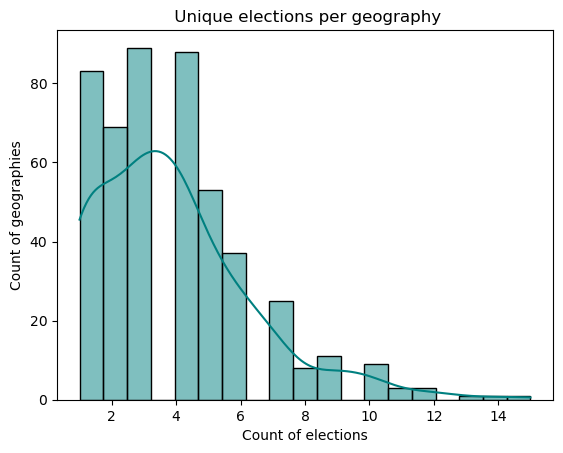

In [187]:
sns.histplot(data=geo_election_counts,  kde=True, color="teal")
plt.title(" Unique elections per geography")
plt.ylabel('Count of geographies')
plt.xlabel('Count of elections')

### Add Ntnl Economic stats 

**Load economic data CPI and unemployment**

In [188]:
#Load in the data

#Read in elections data
cpi = pd.read_csv("CPI.csv", index_col='Year')

#Look at shape, col names, and col types
print(cpi.shape)
print(cpi.columns,'\n')
print(cpi.dtypes)
cpi.head()

(56, 14)
Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'HALF1', 'HALF2'],
      dtype='object') 

Jan      float64
Feb      float64
Mar      float64
Apr      float64
May      float64
Jun      float64
Jul      float64
Aug      float64
Sep      float64
Oct      float64
Nov      float64
Dec      float64
HALF1    float64
HALF2    float64
dtype: object


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
Year,,,,,,,,,,,,,,
1970,37.9,38.1,38.3,38.5,38.6,38.8,38.9,39.0,39.2,39.4,39.6,39.8,NaN,NaN
1971,39.9,39.9,40.0,40.1,40.3,40.5,40.6,40.7,40.8,40.9,41.0,41.1,NaN,NaN
1972,41.2,41.4,41.4,41.5,41.6,41.7,41.8,41.9,42.1,42.2,42.4,42.5,NaN,NaN
1973,42.7,43.0,43.4,43.7,43.9,44.2,44.2,45.0,45.2,45.6,45.9,46.3,NaN,NaN
1974,46.8,47.3,47.8,48.1,48.6,49.0,49.3,49.9,50.6,51.0,51.5,51.9,NaN,NaN


In [189]:
#Load in the data

#Read in unemployment data
unemployment = pd.read_csv("Unemployment19772025.csv", index_col='Year')

#Look at shape, col names, and col types
print(unemployment.shape)
print(unemployment.columns,'\n')
print(unemployment.dtypes)
unemployment.head()


(49, 13)
Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Annual'],
      dtype='object') 

Jan       float64
Feb       float64
Mar       float64
Apr       float64
May       float64
Jun       float64
Jul       float64
Aug       float64
Sep       float64
Oct       float64
Nov       float64
Dec       float64
Annual    float64
dtype: object


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
Year,,,,,,,,,,,,,
1977,7.5,7.6,7.4,7.2,7.0,7.2,6.9,7.0,6.8,6.8,6.8,6.4,7.1
1978,6.4,6.3,6.3,6.1,6.0,5.9,6.2,5.9,6.0,5.8,5.9,6.0,6.1
1979,5.9,5.9,5.8,5.8,5.6,5.7,5.7,6.0,5.9,6.0,5.9,6.0,5.9
1980,6.3,6.3,6.3,6.9,7.5,7.6,7.8,7.7,7.5,7.5,7.5,7.2,7.2
1981,7.5,7.4,7.4,7.2,7.5,7.5,7.2,7.4,7.6,7.9,8.3,8.5,7.6


**Transform economic data into tidy form**

In [190]:
#function to clean into tidy data form 

def tidyDf (df, measureName):
    df = pd.melt(df, var_name="Month", value_vars=["Jan", "Feb", "Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], ignore_index=False, value_name=measureName)
    
    #convert the columns into Nums
    month_conversion = {'Jan':1,'Feb':2, 'Mar':3, "Apr":4, "May":5, "Jun":6, "Jul":7 ,"Aug":8 ,"Sep":9 ,"Oct":10,"Nov":11, "Dec":12}
    df['Month'] = df['Month'].replace(month_conversion)

    #Sort and make index a column
    df.sort_values(by=['Year', 'Month'], ascending=[True, True], inplace=True)
    df = df.reset_index()
    return df
   

    

In [191]:
unemployment = tidyDf(unemployment, "UE")
cpi = tidyDf(cpi, 'CPI')


C:\Users\zspba\AppData\Local\Temp\ipykernel_38736\3980427062.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\zspba\AppData\Local\Temp\ipykernel_38736\3980427062.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [192]:
cpi.head()

,Year,Month,CPI
0,1970,1,37.9
1,1970,2,38.1
2,1970,3,38.3
3,1970,4,38.5
4,1970,5,38.6


In [193]:
unemployment.head()

,Year,Month,UE
0,1977,1,7.5
1,1977,2,7.6
2,1977,3,7.4
3,1977,4,7.2
4,1977,5,7.0


**Function to get summary stats for economic variables X months previous**

In [194]:
def getMonths (row, months, econDf):

  if pd.isna(row['month']):
    return None
  else:
    #Sets date of the election of interest
    currMonth = int(row['month'])
    currYear = int(row['year'])

    #Find the location of that month and year in the economic data df and the specified number of months that proceed it
    tempindex = econDf.loc[(econDf['Month'] == currMonth) & (econDf['Year'] == currYear)].index[0]
    targetindex = tempindex-months

    #Get the subset of rows for the months that are in the specified window
    #What happens if the targetindex doesn't exist
    months = econDf.iloc[targetindex:tempindex]

    return months #the rows found


def summary (row, months, econDf, measureName):
    Summ_months = getMonths(row, months, econDf)
    if Summ_months is None:
        row[f'{measureName} {months}Mo Avg'] = np.nan
        row[f'{measureName} {months}Mo Max'] = np.nan
        row[f'{measureName} {months}Mo Min'] = np.nan
        return row
    else:
        row[f'{measureName} {months}Mo Avg'] = Summ_months[measureName].mean()
        row[f'{measureName} {months}Mo Max'] = Summ_months[measureName].max()
        row[f'{measureName} {months}Mo Min'] = Summ_months[measureName].min()
        return row

**Append summary statistics on unemployment and CPI for 12 months and 3 months prior to the elections**

In [195]:
df = df.apply(lambda x: summary (x, 12, unemployment, 'UE'), axis = 1)
df = df.apply(lambda x: summary (x, 3, unemployment, 'UE'), axis = 1)
df = df.apply(lambda x: summary (x, 12, cpi, 'CPI'), axis = 1)
df = df.apply(lambda x: summary (x, 3, cpi, 'CPI'), axis = 1)


df.head()

,contest,full_name,ledb_candid,office_consolidated,fips,geo_name,year,month,votes,vote_share,incumbent,winner,n_winners,prob_democrat,prob_republican,pid_est,prob_male,prob_female,gender_est,prob_black,prob_white,prob_hispanic,prob_asian,prob_other,race_est,contributor.cfscore,bonica.cid,percent_women,percent_white,percent_black,percent_hispanic,percent_asian_american,candidate_count,UE 12Mo Avg,UE 12Mo Max,UE 12Mo Min,UE 3Mo Avg,UE 3Mo Max,UE 3Mo Min,CPI 12Mo Avg,CPI 12Mo Max,CPI 12Mo Min,CPI 3Mo Avg,CPI 3Mo Max,CPI 3Mo Min
0,3651000_1993_11_new york_NY_Mayor_mayor_1,rudolph giuliani,35608,Mayor,3651000,new york,1993,11.0,930236.0,0.51,0.0,win,1,0.12,0.88,R,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,0.84,4.667066e+09,0.529239,0.499826,0.280773,0.251432,0.200464,5,7.050000,7.4,6.7,6.766667,6.8,6.7,143.816667,145.600,142.100,145.133333,145.600,144.800
1,3651000_1993_11_new york_NY_Mayor_mayor_1,david dinkins,35567,Mayor,3651000,new york,1993,11.0,876896.0,0.48,1.0,lose,1,1.00,0.00,D,1.0,0.0,M,1.0,0.0,0.0,0.0,0.0,black,-0.49,3.056702e+10,0.529239,0.499826,0.280773,0.251432,0.200464,5,7.050000,7.4,6.7,6.766667,6.8,6.7,143.816667,145.600,142.100,145.133333,145.600,144.800
2,3651000_2013_11_new york_NY_Mayor_mayor_1,bill de blasio,34761,Mayor,3651000,new york,2013,11.0,795679.0,0.73,0.0,win,1,1.00,0.00,D,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,NaN,NaN,0.524456,0.436201,0.251765,0.287251,0.222598,18,7.525000,8.0,7.2,7.200000,7.2,7.2,232.422667,233.669,231.221,233.556333,233.669,233.456
3,3651000_1997_11_new york_NY_Mayor_mayor_1,rudy giuliani,35608,Mayor,3651000,new york,1997,11.0,783815.0,0.58,1.0,win,1,0.00,1.00,R,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,0.55,3.300166e+09,0.527511,0.469403,0.272300,0.261922,0.219124,6,5.066667,5.4,4.7,4.800000,4.9,4.7,160.050000,161.500,158.700,161.166667,161.500,160.800
4,3651000_2017_11_new york_NY_Mayor_mayor_1,bill de blasio,34761,Mayor,3651000,new york,2017,11.0,760112.0,0.66,1.0,win,1,1.00,0.00,D,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,NaN,NaN,0.523626,0.431091,0.246823,0.289247,0.175935,7,4.450000,4.7,4.2,4.300000,4.4,4.2,244.252167,246.626,242.026,246.081333,246.626,245.183


**Export to csv**

In [ ]:
df.to_csv('VeryNew.csv', index=False)

### Assess the missingness of the data

**source:** https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/ 

In [197]:
import missingno as msno

<Axes: >

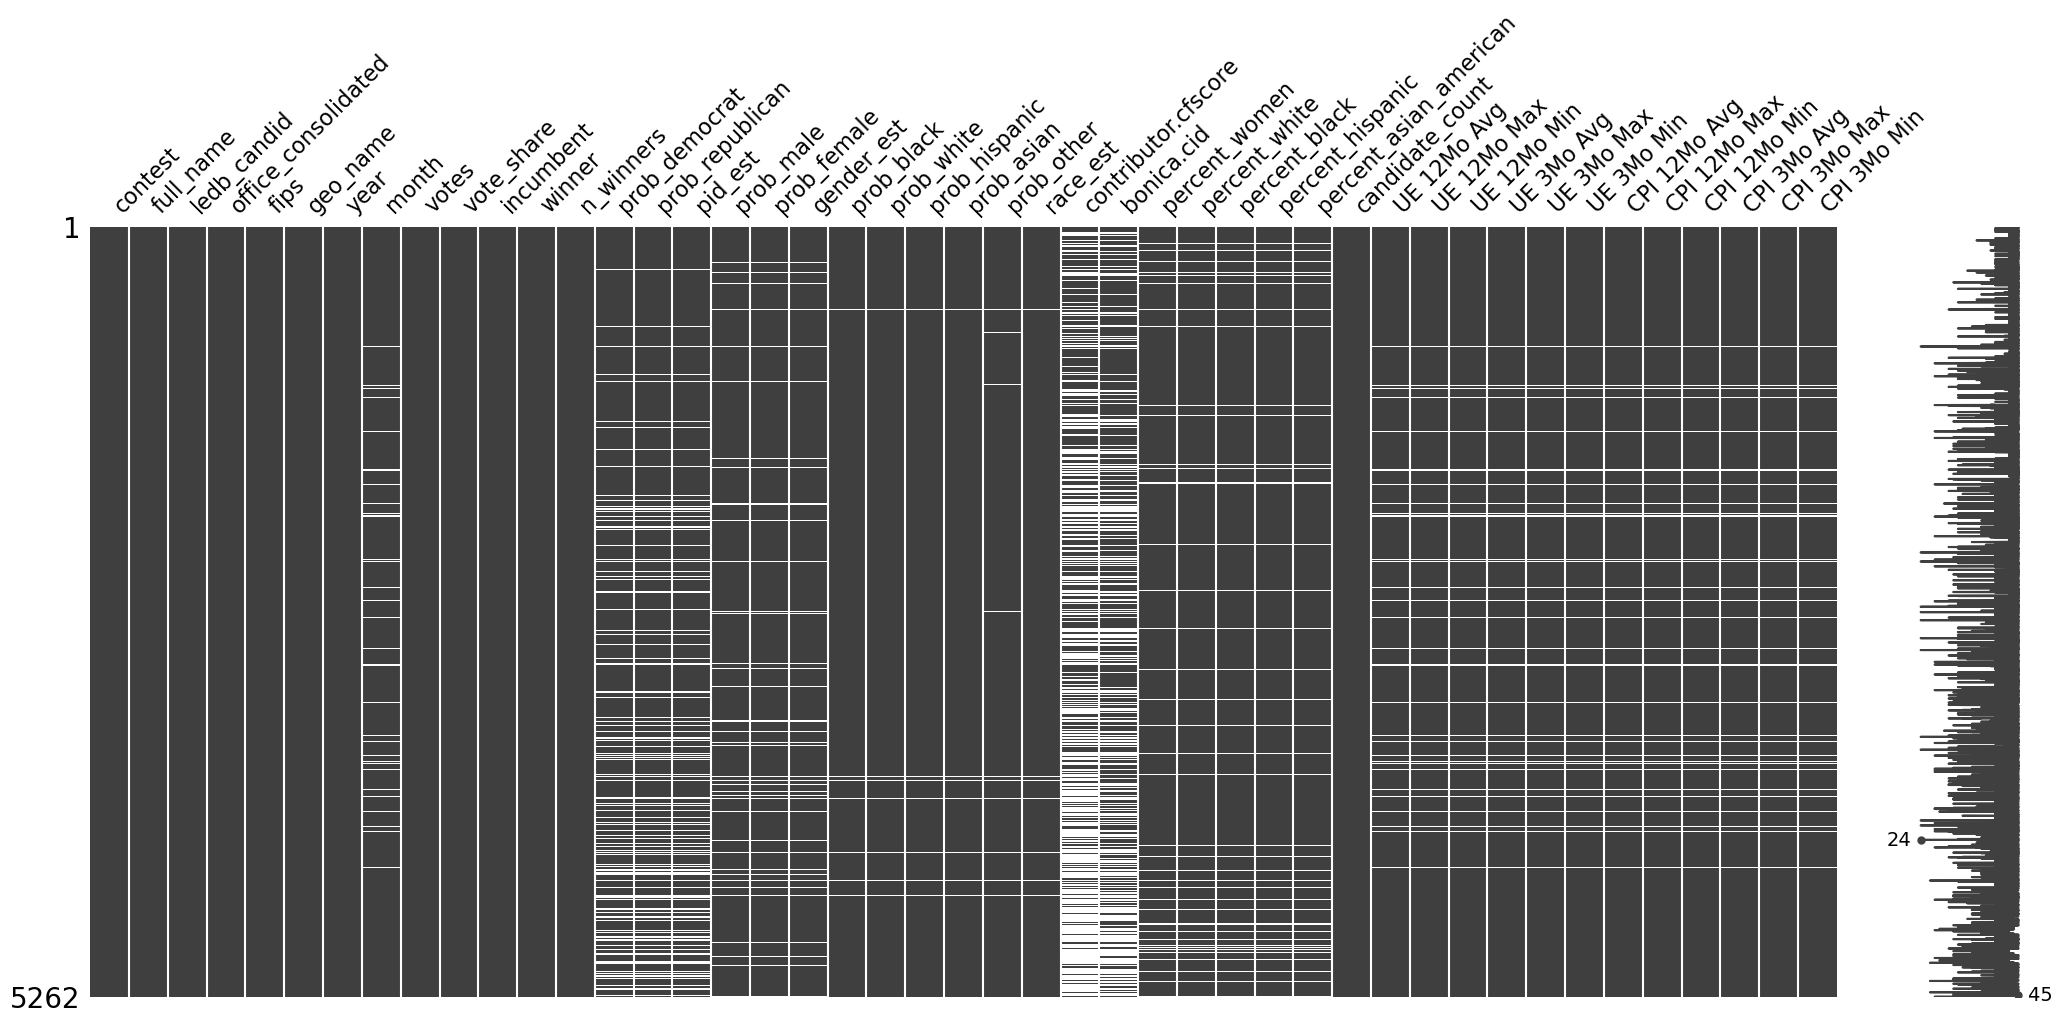

In [198]:
msno.matrix(df) 

<Axes: >

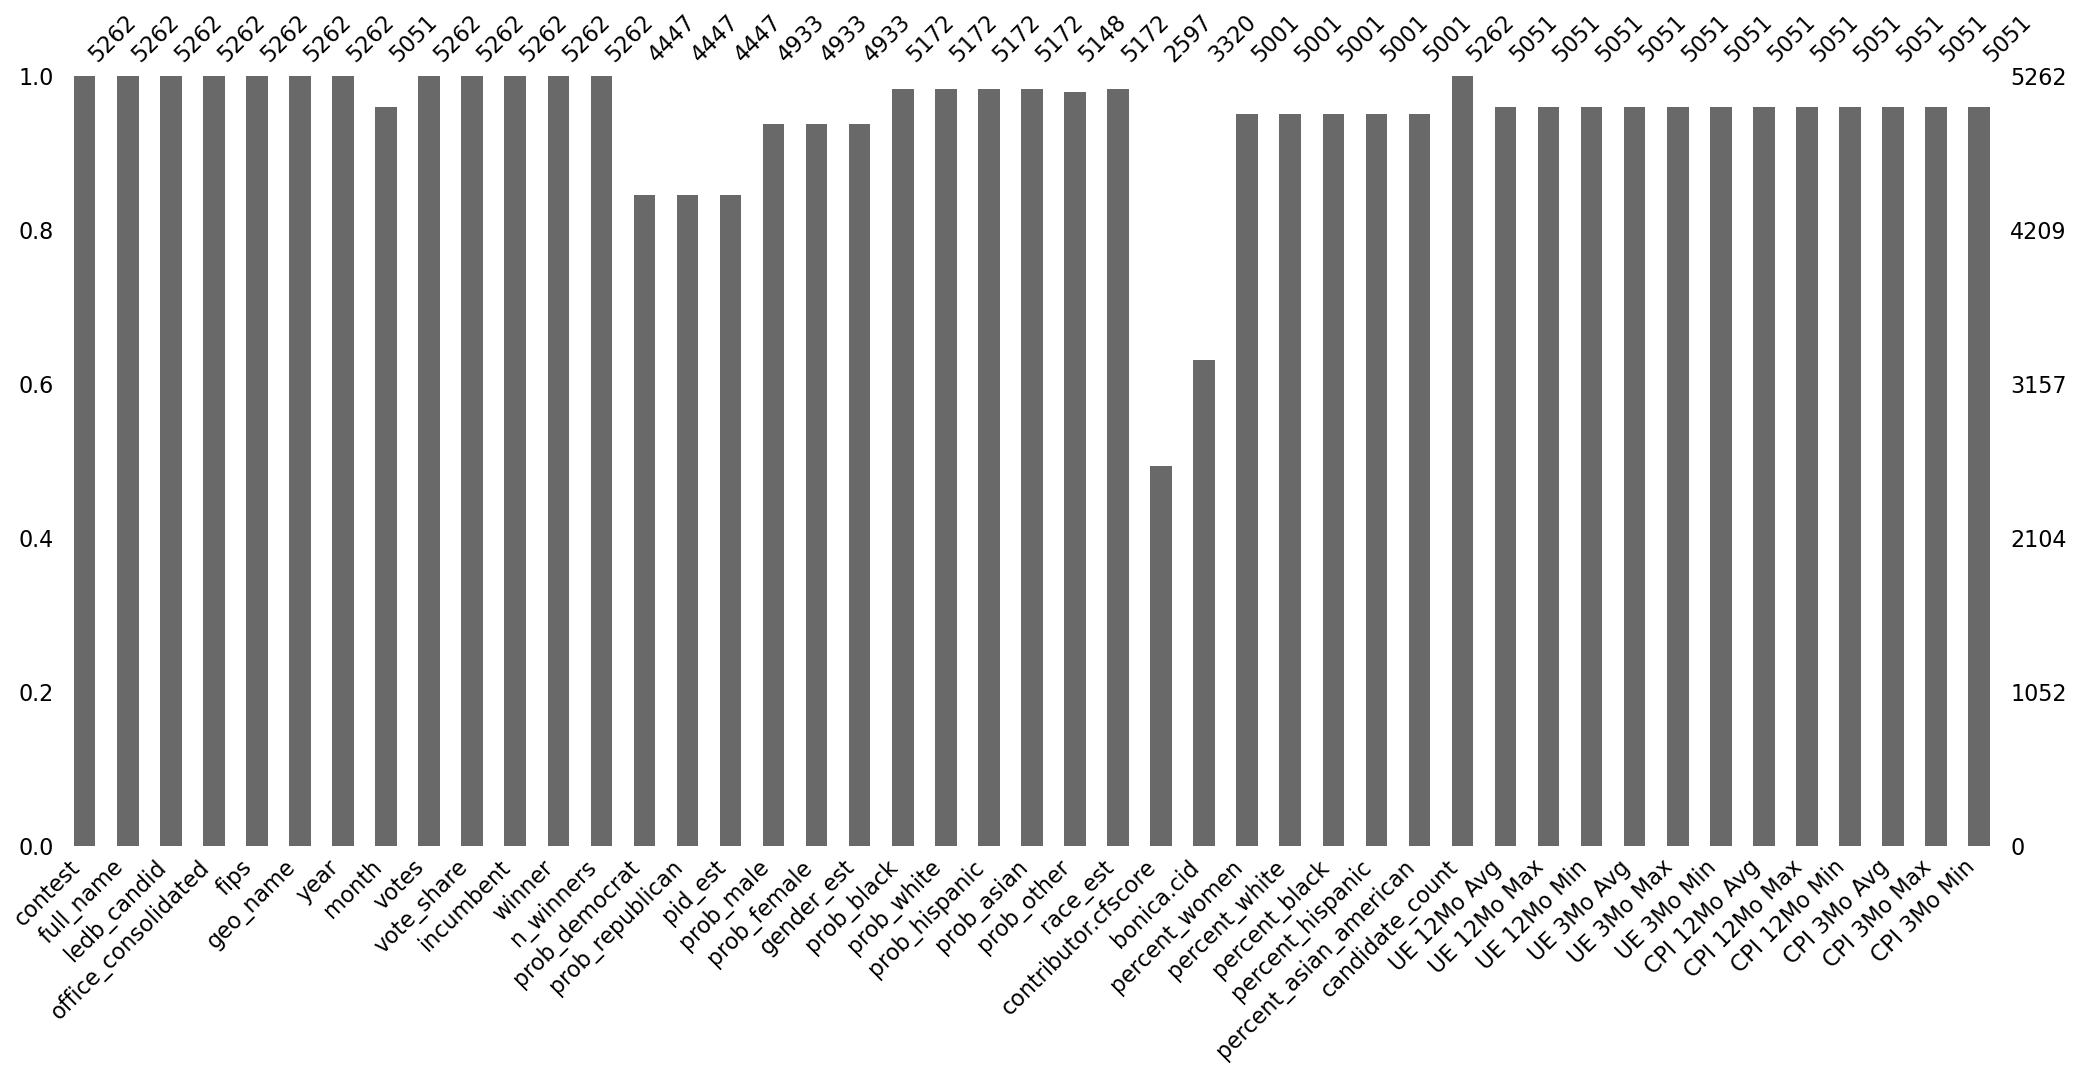

In [199]:
#missingness bar chart
msno.bar(df)

**Comments**
- bonica.cid and contributor.cfscore have the most missing values with about 50% and 63% of the rows missing these values respectively. I expected there to be a smaller difference in the race. However, it makes sense that there are fewer contributor scores than ids because the candidate can have been given an id in the system but there was not enough data available to develop the ideology score.  
-  A fair amount of rows missing the economic vars, likely due to missing month name 
-  I expected the party estimate (15%), gender(6.3%), and race estimations (1.8%) to be missing at similar rates

<Axes: >

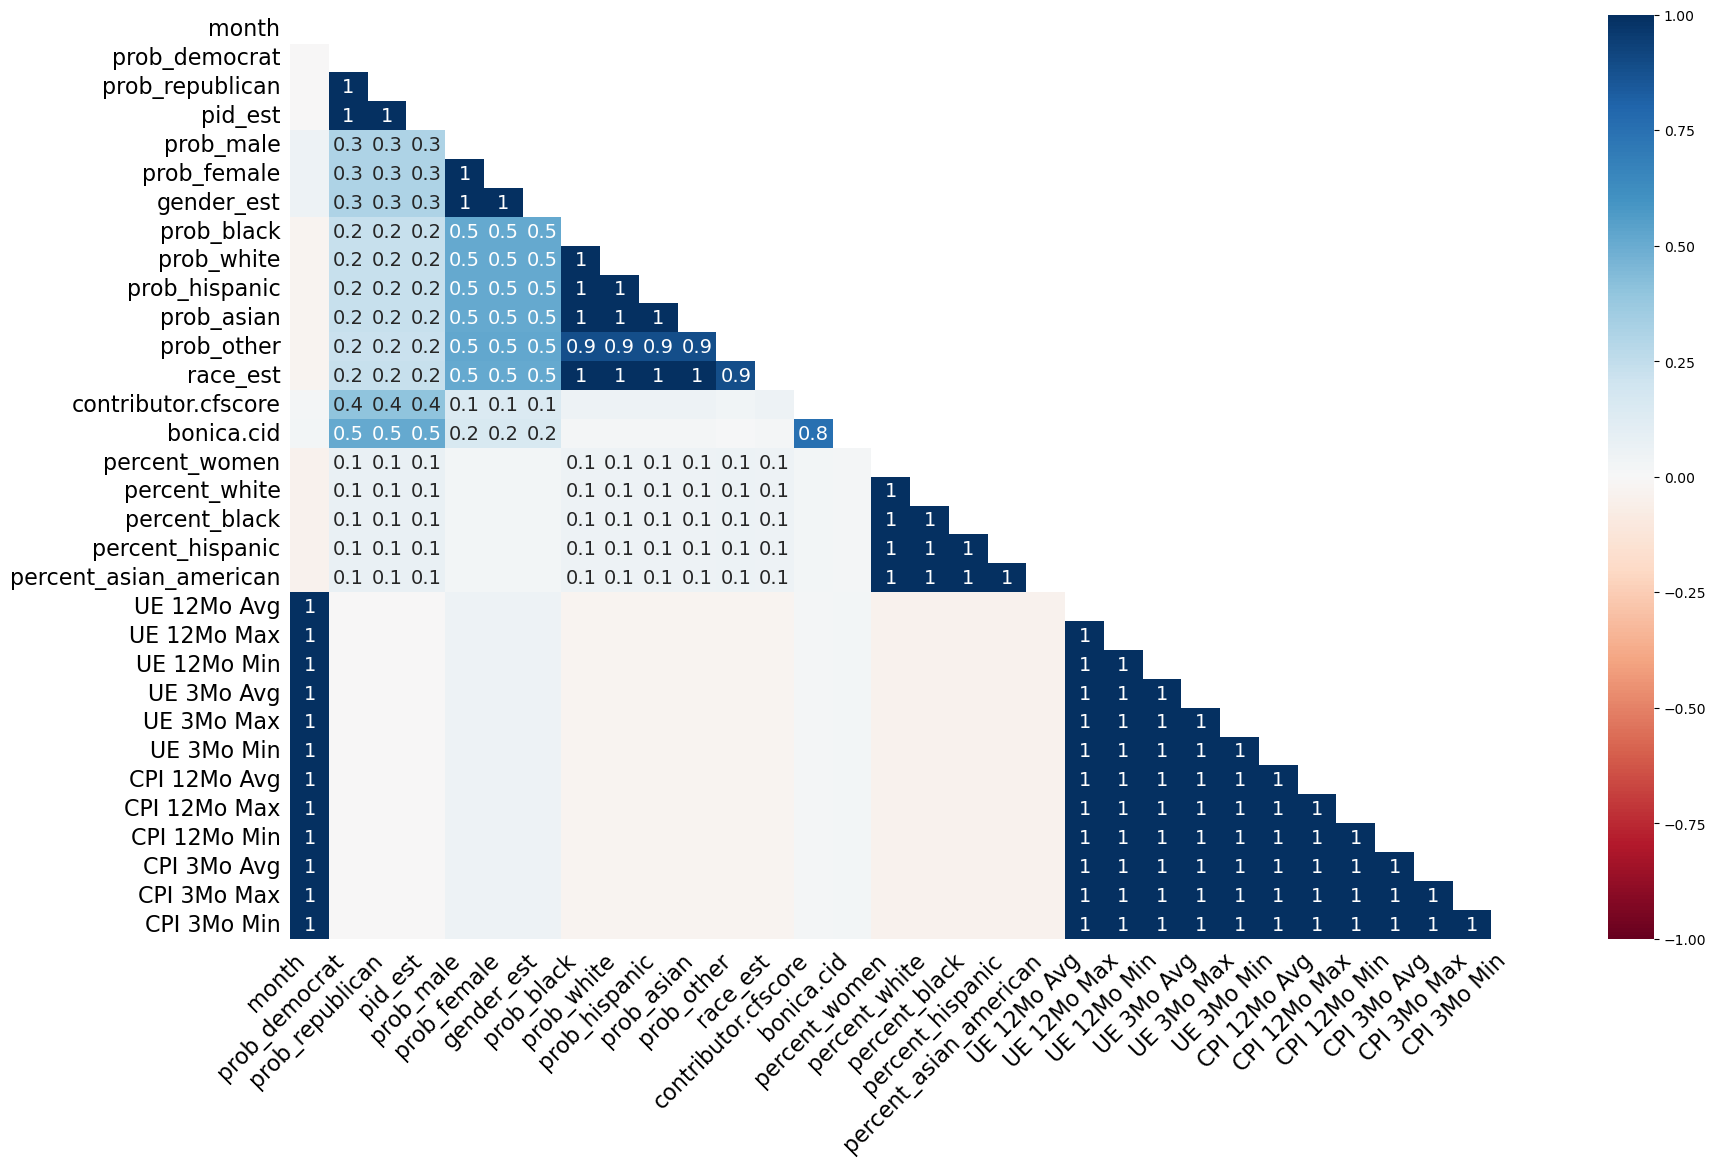

In [200]:
msno.heatmap(df) 

# A value near -1 means if one variable appears then the other variable is very likely to be missing.
# A value near 0 means there is no dependence between the occurrence of missing values of two variables.
# A value near 1 means if one variable appears then the other variable is very likely to be present.